In [255]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [256]:
#load in the iris dataset and split between targets and features
iris = datasets.load_iris()
features = iris.data
target = iris.target

#One Hot Encode the target data
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(target.reshape(-1,1))

#split the data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [257]:
#define and vectorize the ReLu function
def unvec_ReLu(z):
    if z <= 0:
        return 0
    else:
        return z
ReLu = np.vectorize(unvec_ReLu)

#define the SoftMax function
def SoftMax(z):
    return np.exp(z) / np.sum(np.exp(z))

#define the Feed Forward function
def ff(x, w1, w2, b1, b2):
    z1 = w1.dot(x) + b1 #compute z1 by finding the dot product of the input layer and random weights
    a1 = ReLu(z1) #compute the hidden layer by applying the ReLu function to z1
    z2 = w2.dot(a1) + b2 #compute z2 by finding the dot product of the hidden layer and random weights
    y_pred = SoftMax(z2) #compute the outputs or preductions by applying the SoftMax function to z2
    return z1, a1, z2, y_pred #return all values


In [258]:
#define loss function - binary crossentropy
def binary_crossentropy(y_true, y_pred):
   return  -(np.sum(y_true * np.log(y_pred)))

#define derivative of the SoftMax function
def SoftMax_dv(z):
   return SoftMax(z) * (1 - SoftMax(z))

#define derivative of ReLu
def un_vec_ReLu_dv(z):
   if z <= 0:
      return 0
   else:
      return 1
   
ReLu_dv = np.vectorize(un_vec_ReLu_dv)
   
#set the learning rate
lr = 0.0001

In [259]:
#randomize weights
W1 = np.random.rand(2,4)
W2 = np.random.rand(3,2)
b1 = np.random.rand(2,)
b2 = np.random.rand(3,)
losses=[]
epochs = 10

for epoch in range(epochs):
    epoch_loss = 0  # Reset epoch loss for each epoch
    for i in range(len(y_train)):
        # Forward pass
        z1, a1, z2, y_pred = ff(X_train[i], W1, W2, b1, b2)

        # Stabilize predictions
        y_pred += 0.0001  # Avoid log(0)
        y_pred /= np.sum(y_pred)

        # Compute the loss for this sample and add to epoch loss
        sample_loss = binary_crossentropy(y_train[i], y_pred)
        epoch_loss += sample_loss

        # Backpropagation
        dLdZ2 = (-y_train[i] / y_pred) * SoftMax_dv(z2)
        dLdZ1 = dLdZ2.dot(W2) * ReLu_dv(z1)
        dLdW1 = np.outer(dLdZ1, X_train[i])
        dLdb1 = dLdZ1
        dLdW2 = np.outer(dLdZ2, a1)
        dLdb2 = dLdZ2

        # Update weights and biases
        W1 -= lr * dLdW1
        W2 -= lr * dLdW2
        b1 -= lr * dLdb1
        b2 -= lr * dLdb2

        # Print weights after update
        print(f"After update, W1: {W1}, W2: {W2}")

    # Append the average loss for the epoch
    losses.append(epoch_loss / len(y_train))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(y_train)}")



After update, W1: [[0.92246975 0.77037639 0.81933363 0.39217981]
 [0.25003751 0.09166156 0.979261   0.2612632 ]], W2: [[0.68420943 0.3521497 ]
 [0.50353476 0.12917146]
 [0.90655942 0.58467034]]
After update, W1: [[0.92308671 0.77065182 0.8197633  0.392301  ]
 [0.25029713 0.09177745 0.9794418  0.2613142 ]], W2: [[0.68526056 0.35278829]
 [0.50442458 0.12971205]
 [0.90658931 0.58468851]]
After update, W1: [[0.92308671 0.77065182 0.8197633  0.392301  ]
 [0.25029713 0.09177745 0.9794418  0.2613142 ]], W2: [[0.68526056 0.35278829]
 [0.50442458 0.12971205]
 [0.90658931 0.58468851]]
After update, W1: [[0.92419561 0.77113696 0.82073358 0.39266486]
 [0.25080805 0.09200098 0.97988886 0.26148184]], W2: [[0.68792784 0.35450266]
 [0.50542796 0.13035696]
 [0.90661459 0.58470475]]
After update, W1: [[0.92419561 0.77113696 0.82073358 0.39266486]
 [0.25080805 0.09200098 0.97988886 0.26148184]], W2: [[0.68792784 0.35450266]
 [0.50542796 0.13035696]
 [0.90661459 0.58470475]]
After update, W1: [[0.92531997

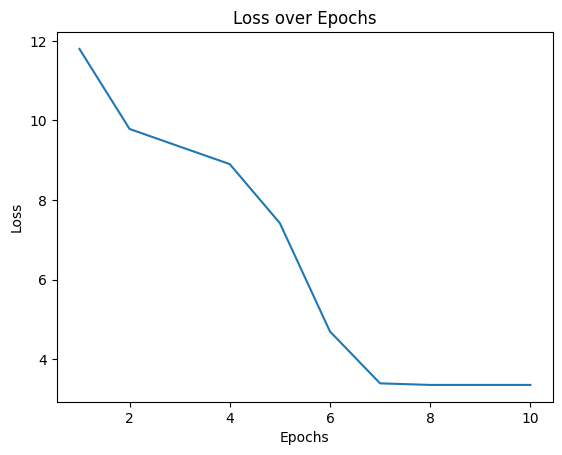

In [260]:
plt.plot(range(1, epochs + 1), losses)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()